Business Objective:

This is a classification project, since the variable to predict is binary (bankruptcy or non-bankruptcy). The goal here is to model the probability that a business goes bankrupt from different features.
The data file contains 7 features about 250 companies
The data set includes the following variables:
1.	industrial_risk: 0=low risk, 0.5=medium risk, 1=high risk.
2.	management_risk: 0=low risk, 0.5=medium risk, 1=high risk.
3.	financial flexibility: 0=low flexibility, 0.5=medium flexibility, 1=high flexibility.
4.	credibility: 0=low credibility, 0.5=medium credibility, 1=high credibility.
5.	competitiveness: 0=low competitiveness, 0.5=medium competitiveness, 1=high competitiveness.
6.	operating_risk: 0=low risk, 0.5=medium risk, 1=high risk.
7.	class: bankruptcy, non-bankruptcy (target variable).

Acceptance Criterion: Need to deploy the end results using Flask /Streamlit.etc.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df_bank=pd.read_csv("bankruptcy-prevention_2.csv")

In [ ]:
df_bank.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [ ]:
df_bank.tail()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy
249,1.0,0.0,0.5,0.5,1.0,1.0,non-bankruptcy


In [ ]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [ ]:
df_bank.isna().sum()

industrial_risk           0
 management_risk          0
 financial_flexibility    0
 credibility              0
 competitiveness          0
 operating_risk           0
 class                    0
dtype: int64

In [ ]:
df_bank.nunique()

industrial_risk           3
 management_risk          3
 financial_flexibility    3
 credibility              3
 competitiveness          3
 operating_risk           3
 class                    2
dtype: int64

In [ ]:
df_bank.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_bank.columns

Index(['industrial_risk   ', ' management_risk', ' financial_flexibility',
       ' credibility', ' competitiveness', ' operating_risk', ' class'],
      dtype='object')

In [ ]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df_bank[' class'] = LE.fit_transform(df_bank[' class'])

In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

data1 = ['industrial_risk   ', ' management_risk', ' financial_flexibility',
       ' credibility', ' competitiveness', ' operating_risk', ' class']

# Calculate grid dimensions
Dimension = 1
num_rows = (len(data1) + Dimension - 1) // Dimension

# Create subplots
fig = make_subplots(rows=num_rows, cols=Dimension, subplot_titles=data1)

# Plot each feature
for i, column in enumerate(data1):
    fig.add_trace(go.Box(x=df_bank[column], name=column), row=(i // Dimension) + 1, col=(i % Dimension) + 1)

# Update layout
fig.update_layout(height=800, width=1000, showlegend=False)

fig.show()

In [ ]:

df_bank.corr()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
industrial_risk,1.000000,0.255127,-0.162624,-0.014438,-0.257814,0.144507,-0.227823
management_risk,0.255127,1.000000,-0.254845,-0.303341,-0.306568,0.213874,-0.370838
financial_flexibility,-0.162624,-0.254845,1.000000,0.524951,0.686612,-0.116903,0.751020
credibility,-0.014438,-0.303341,0.524951,1.000000,0.675689,-0.288458,0.755909
competitiveness,-0.257814,-0.306568,0.686612,0.675689,1.000000,-0.211383,0.899452
operating_risk,0.144507,0.213874,-0.116903,-0.288458,-0.211383,1.000000,-0.279786
class,-0.227823,-0.370838,0.751020,0.755909,0.899452,-0.279786,1.000000


<Axes: >

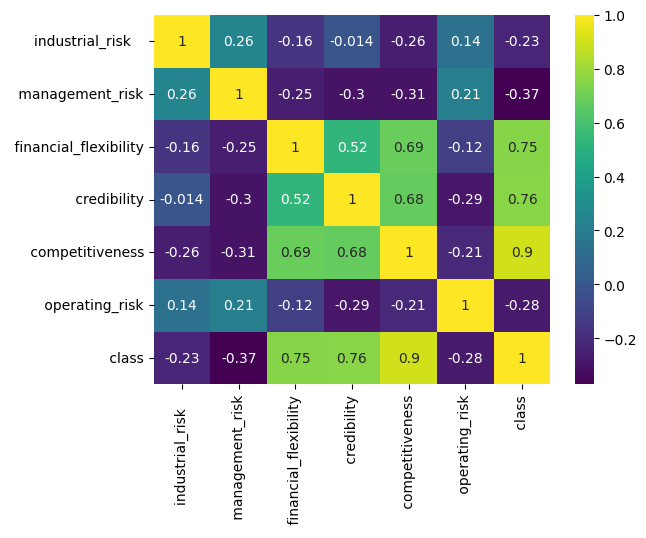

In [ ]:
import seaborn as sns
sns.heatmap(df_bank.corr(),annot=True,cmap='viridis')

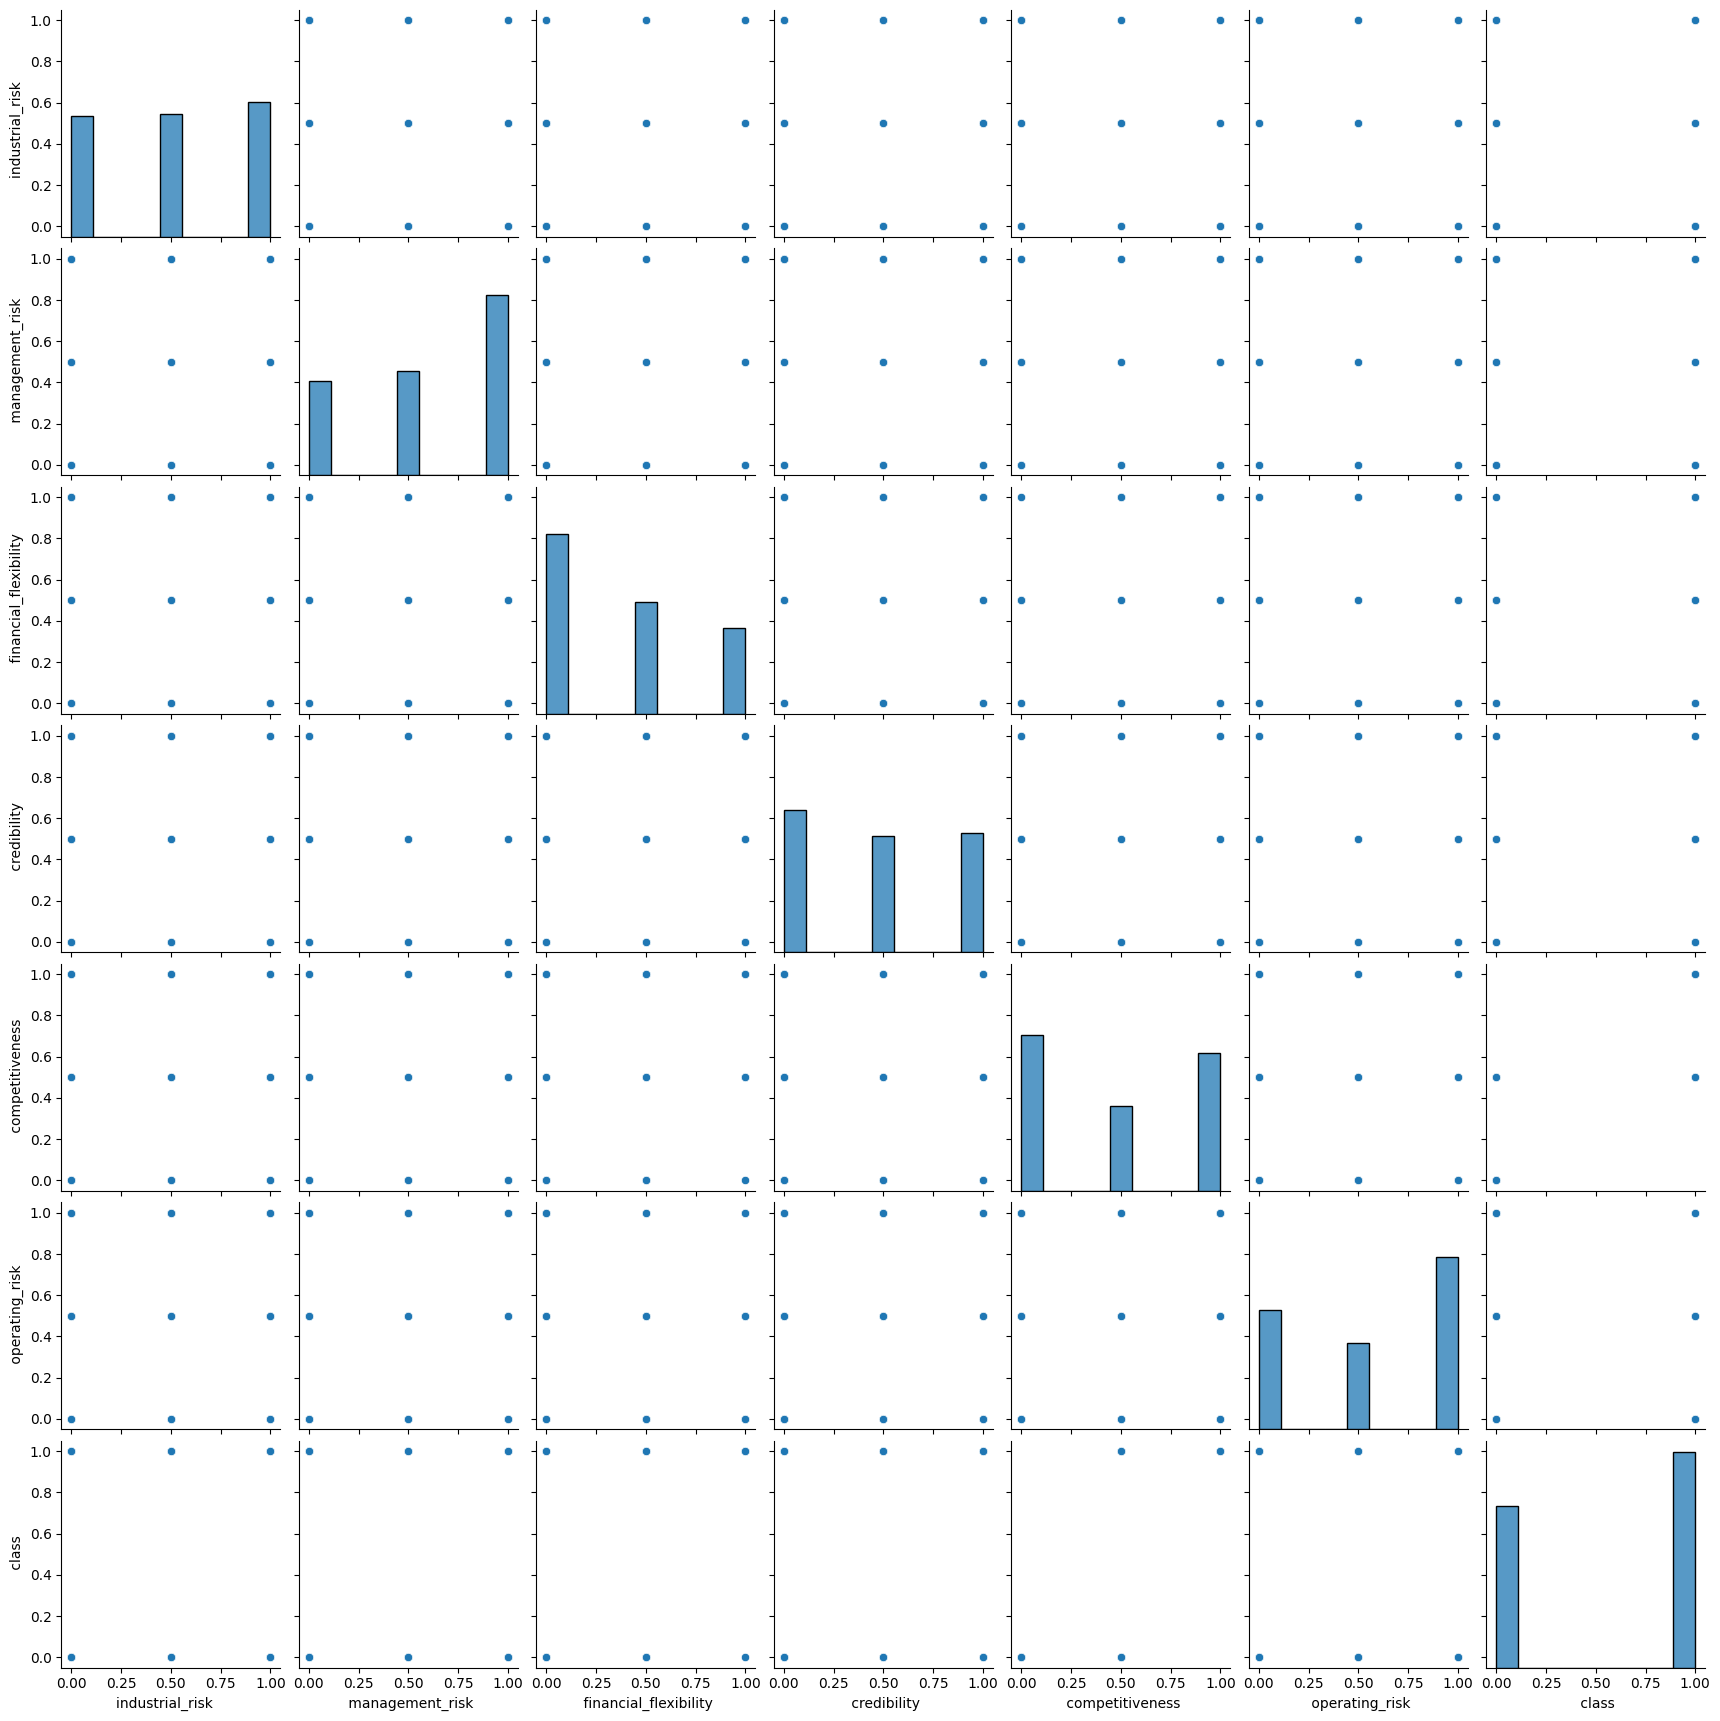

In [ ]:
sns.pairplot(df_bank)

<Axes: xlabel=' class', ylabel='count'>

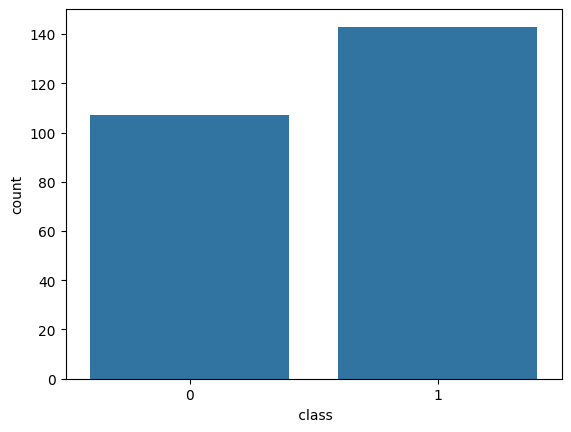

In [ ]:
# Plotting the Countplot to Check how many companies are Bankrupt and non-bankrupt
sns.countplot(x=df_bank[' class'],data=df_bank)

<ipython-input-16-9ae14c5d9f1a>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-16-9ae14c5d9f1a>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-16-9ae14c5d9f1a>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-16-9ae14c5d9f1a>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-16-9ae14c5d9f1a>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be

<Axes: xlabel=' operating_risk', ylabel='count'>

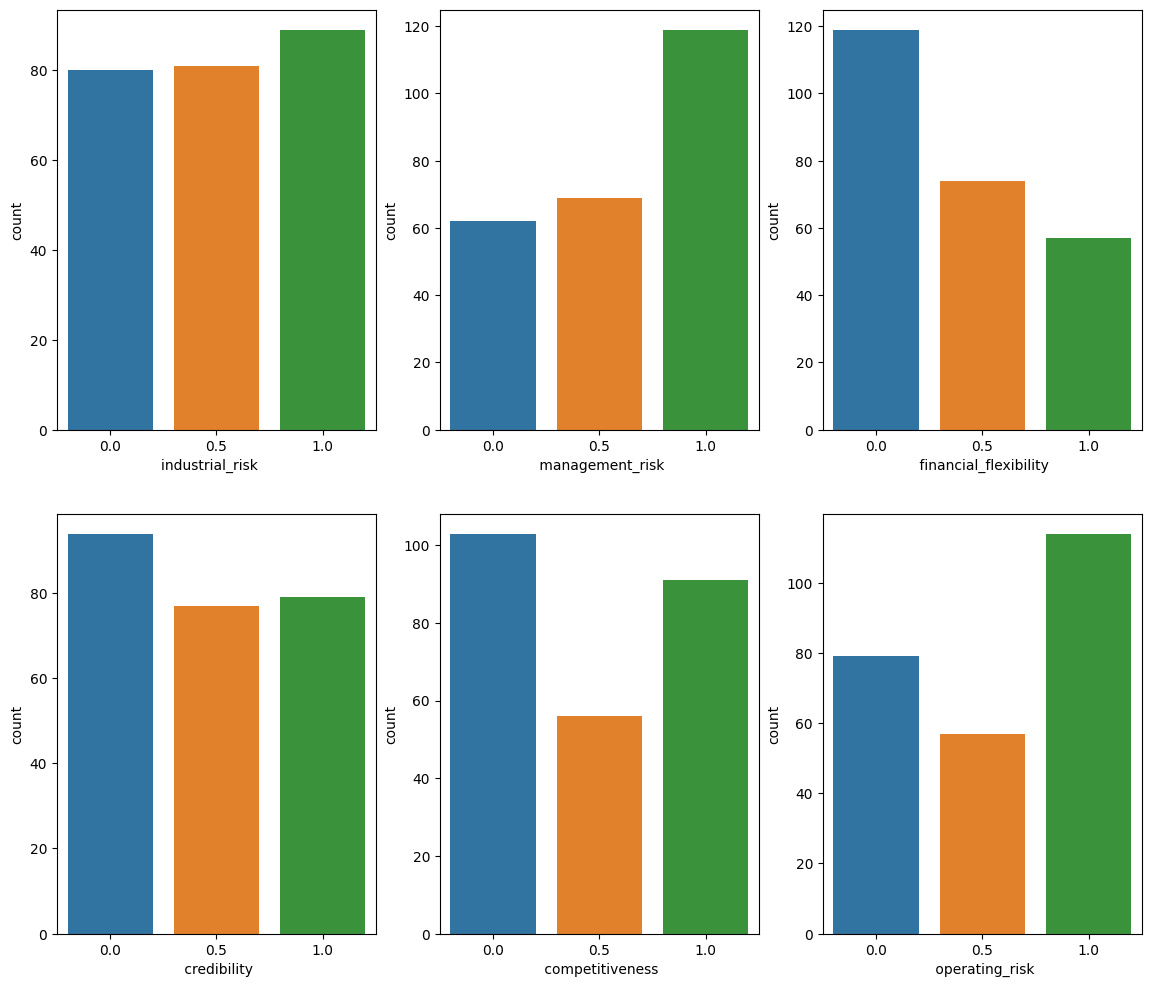

In [ ]:
# Checking the count of companies w.r.t all the independent variables
fig,axes=plt.subplots(2,3,figsize=(14,12))
sns.countplot(x='industrial_risk   ',data=df_bank,palette='tab10',ax=axes[0][0])
sns.countplot(x=' management_risk',data=df_bank,palette='tab10',ax=axes[0][1])
sns.countplot(x=' financial_flexibility',data=df_bank,palette='tab10',ax=axes[0][2])
sns.countplot(x=' credibility',data=df_bank,palette='tab10',ax=axes[1][0])
sns.countplot(x=' competitiveness',data=df_bank,palette='tab10',ax=axes[1][1])
sns.countplot(x=' operating_risk',data=df_bank,palette='tab10',ax=axes[1][2])

In [ ]:
df_bank.columns

Index(['industrial_risk   ', ' management_risk', ' financial_flexibility',
       ' credibility', ' competitiveness', ' operating_risk', ' class'],
      dtype='object')

 class               0   1
industrial_risk           
0.0                 26  54
0.5                 28  53
1.0                 53  36


<Axes: xlabel='industrial_risk   '>

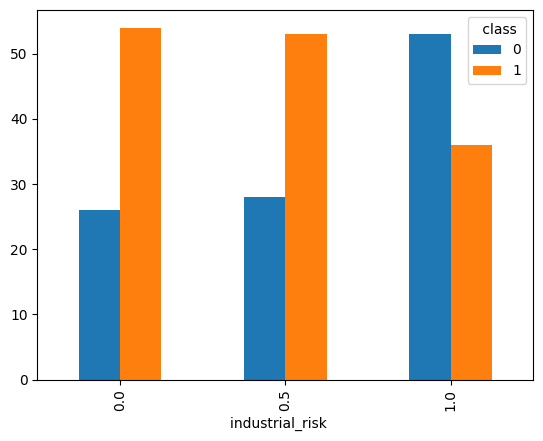

In [ ]:
ir=pd.crosstab(df_bank['industrial_risk   '],df_bank[' class'])
print(ir)
ir.plot(kind='bar')


 class                    0   1
 financial_flexibility         
0.0                     102  17
0.5                       4  70
1.0                       1  56


<Axes: xlabel=' financial_flexibility'>

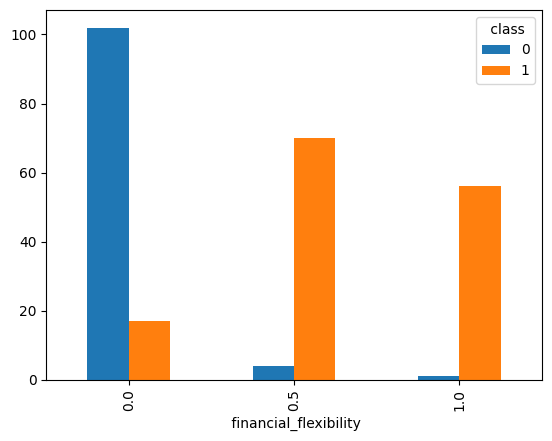

In [ ]:
ff=pd.crosstab(df_bank[' financial_flexibility'],df_bank[' class'])
print(ff)
ff.plot(kind='bar')

 class         0   1
 credibility        
0.0           87   7
0.5           17  60
1.0            3  76


<Axes: xlabel=' credibility'>

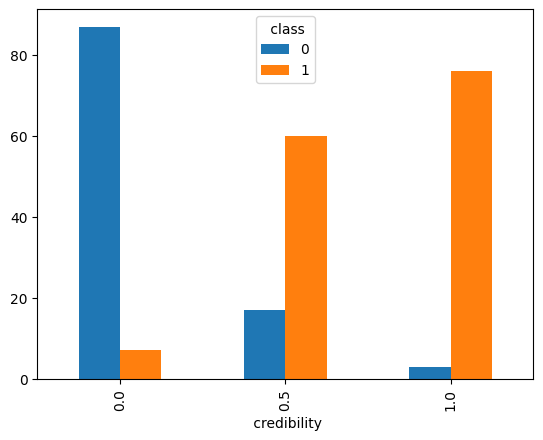

In [ ]:
cred=pd.crosstab(df_bank[' credibility'], df_bank[' class'])
print(cred)
cred.plot(kind='bar')

 class            0   1
 operating_risk        
0.0              19  60
0.5              24  33
1.0              64  50


<Axes: xlabel=' operating_risk'>

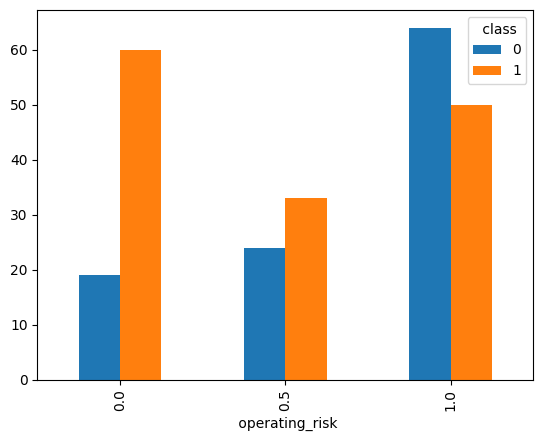

In [ ]:
opr=pd.crosstab(df_bank[' operating_risk'], df_bank[' class'])
print(opr)
opr.plot(kind='bar')

 class              0   1
 competitiveness         
0.0               103   0
0.5                 4  52
1.0                 0  91


<Axes: xlabel=' competitiveness'>

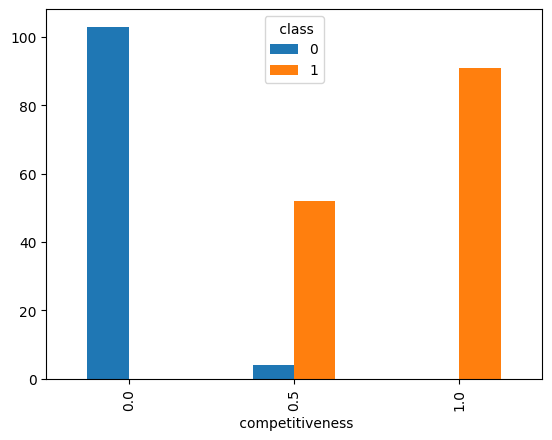

In [ ]:
comp=pd.crosstab(df_bank[' competitiveness'], df_bank[' class'])
print(comp)
comp.plot(kind='bar')

<ipython-input-23-c0f19f82d260>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel=' class', ylabel='Density'>

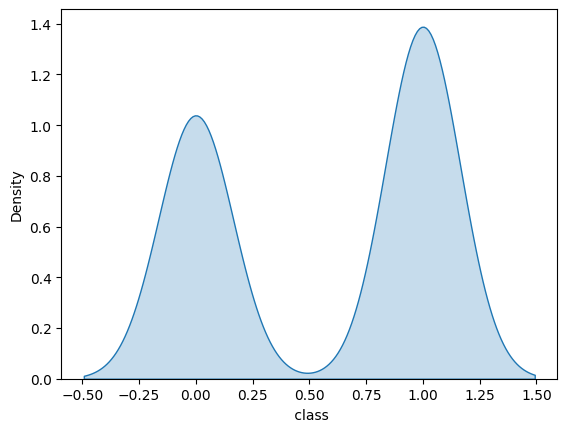

In [ ]:
sns.distplot(df_bank[' class'], bins=10, kde=True, kde_kws={'fill': True}, hist=False)

<ipython-input-24-c496a809e17a>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-24-c496a809e17a>:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-24-c496a809e17a>:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt y

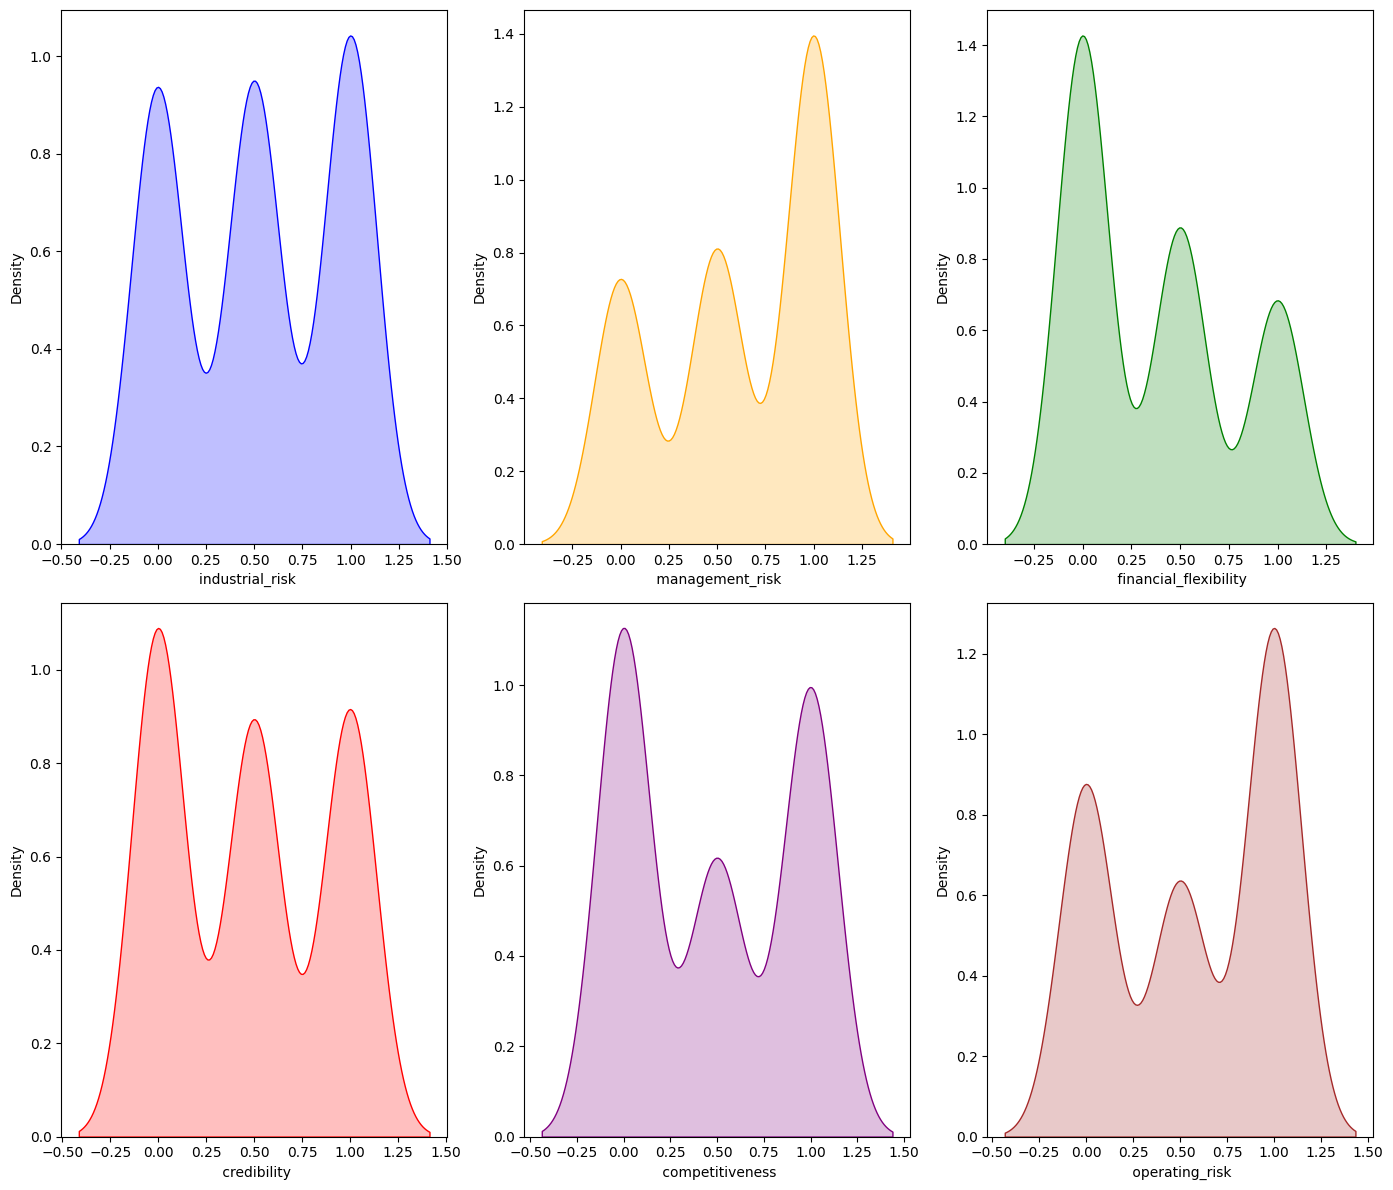

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Checking the distribution of all independent variables
fig, axes = plt.subplots(2, 3, figsize=(14, 12))

sns.distplot(df_bank['industrial_risk   '], kde=True, hist=False, color='blue',kde_kws={'fill': True}, ax=axes[0, 0])
sns.distplot(df_bank[' management_risk'], kde=True, hist=False, color='orange', kde_kws={'fill': True}, ax=axes[0, 1])
sns.distplot(df_bank[' financial_flexibility'], kde=True, hist=False, color='green', kde_kws={'fill': True}, ax=axes[0, 2])
sns.distplot(df_bank[' credibility'], kde=True, hist=False, color='red', kde_kws={'fill': True}, ax=axes[1, 0])
sns.distplot(df_bank[' competitiveness'], kde=True, hist=False, color='purple', kde_kws={'fill': True}, ax=axes[1, 1])
sns.distplot(df_bank[' operating_risk'], kde=True, hist=False, color='brown', kde_kws={'fill': True}, ax=axes[1, 2])

plt.tight_layout()
plt.show()


# Model Building Part


In [ ]:
# Data Partition
X = df_bank.iloc[:,:-1]
Y = df_bank.iloc[:, -1]

In [ ]:
X.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
0,0.5,1.0,0.0,0.0,0.0,0.5
1,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0
3,0.5,0.0,0.0,0.5,0.0,1.0
4,1.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name:  class, dtype: int64

In [ ]:
# Data partition for X_train and Y_tran data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.30)


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(max_depth=6)

DT.fit(X_train,Y_train) # Bo + b1x1 + B2x2
Y_pred_train = DT.predict(X_train)
Y_pred_test = DT.predict(X_test)
training_accuracy = accuracy_score(Y_train,Y_pred_train).round(3)
test_accuracy = accuracy_score(Y_test,Y_pred_test).round(3)

print("Training_accuracy", training_accuracy)
print("test_accuracy", test_accuracy)

Training_accuracy 1.0
test_accuracy 1.0


[Text(0.5, 0.9, 'x[4] <= 0.25\ngini = 0.486\nsamples = 175\nvalue = [73, 102]'),
 Text(0.3333333333333333, 0.7, 'gini = 0.0\nsamples = 71\nvalue = [71, 0]'),
 Text(0.6666666666666666, 0.7, 'x[3] <= 0.25\ngini = 0.038\nsamples = 104\nvalue = [2, 102]'),
 Text(0.5, 0.5, 'x[2] <= 0.25\ngini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(0.3333333333333333, 0.3, 'x[5] <= 0.25\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.16666666666666666, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.6666666666666666, 0.3, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.8333333333333334, 0.5, 'gini = 0.0\nsamples = 96\nvalue = [0, 96]')]

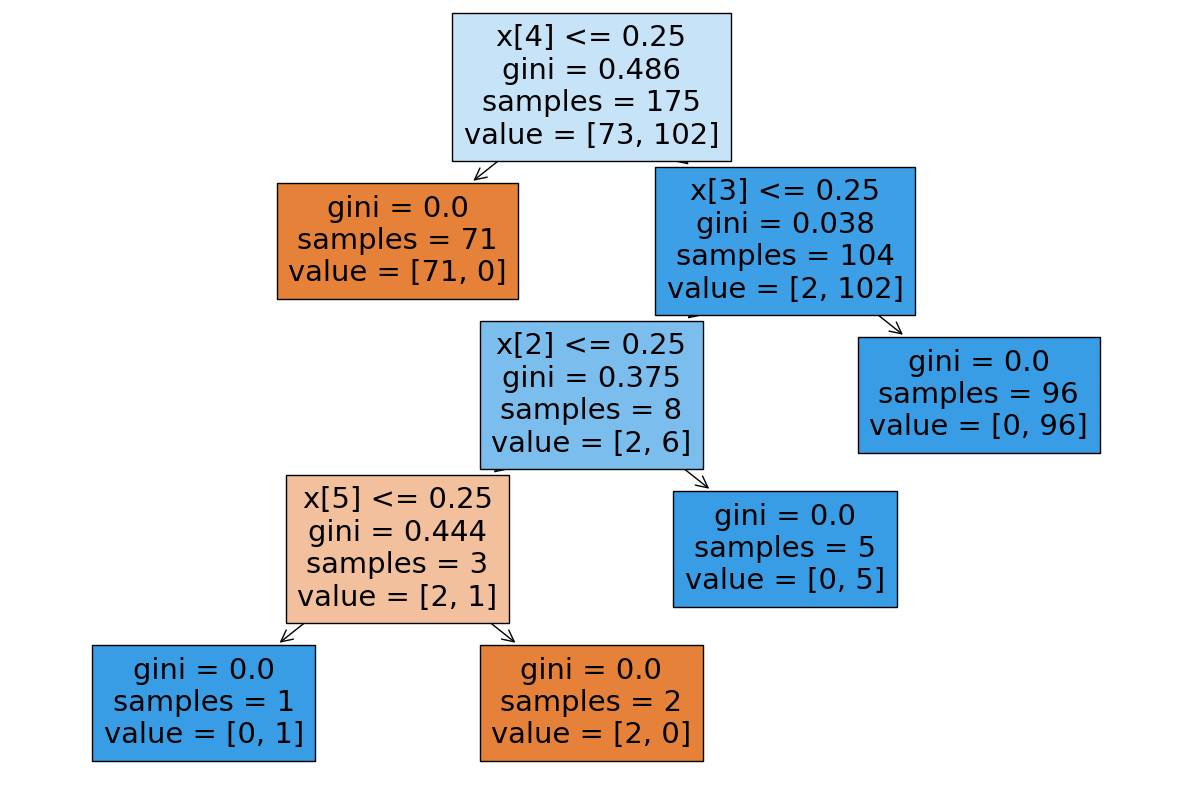

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(DT, filled=True)

In [ ]:
training_accuracy = []
test_accuracy = []
Tr = []
Ts = []


In [ ]:
# validation set method --> validaton hold-off method
DT = DecisionTreeClassifier(max_depth=9)


for i in range(1,101,1):
    X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.30, random_state=i)
    DT.fit(X_train,Y_train)
    Y_pred_train = DT.predict(X_train)
    Y_pred_test = DT.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train).round(3))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test).round(3))

import numpy as np
print("Average trianing accuray",np.mean(training_accuracy).round(3))
print("Average test accuray",np.mean(test_accuracy).round(3))



Average trianing accuray 1.0
Average test accuray 0.99


[Text(0.4, 0.875, 'x[4] <= 0.25\ngini = 0.49\nsamples = 175\nvalue = [75, 100]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 72\nvalue = [72, 0]'),
 Text(0.6, 0.625, 'x[3] <= 0.25\ngini = 0.057\nsamples = 103\nvalue = [3, 100]'),
 Text(0.4, 0.375, 'x[2] <= 0.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 97\nvalue = [0, 97]')]

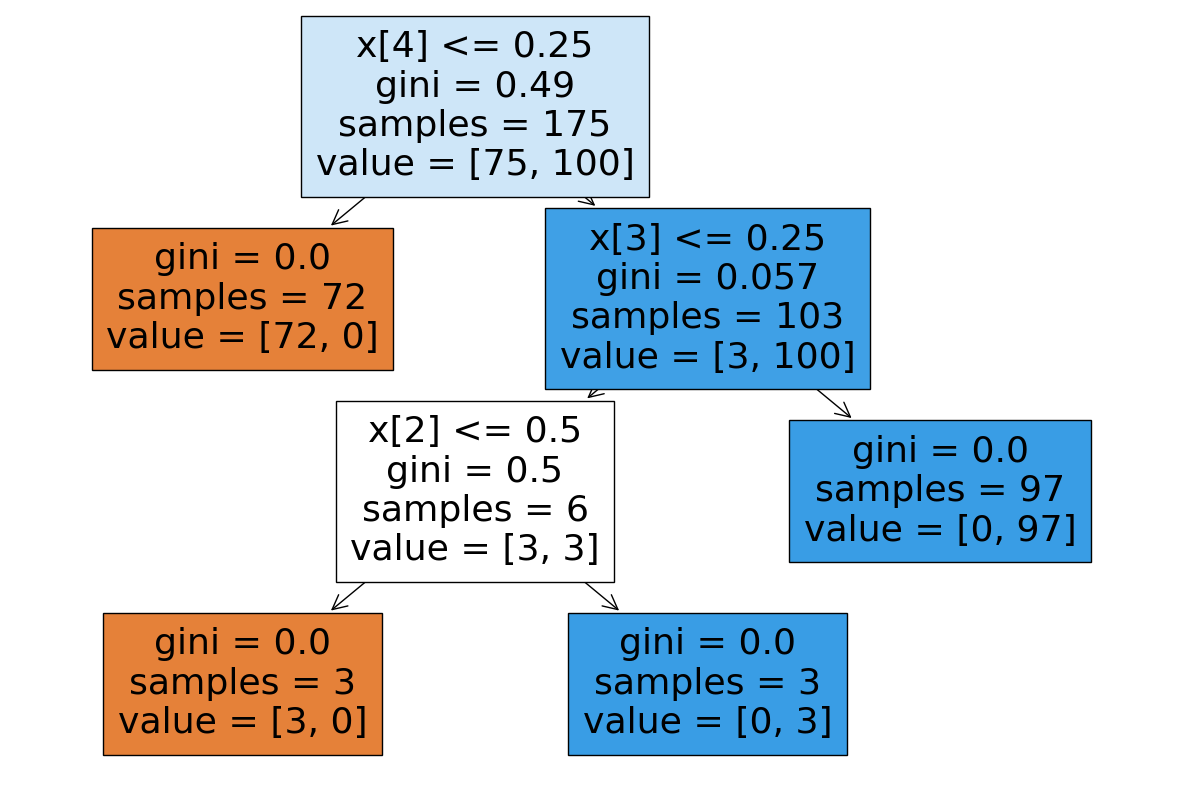

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(DT, filled=True)

In [ ]:
training_error = []
test_error = []
Tr = []
Ts = []

In [ ]:
# validation set method --> validaton hold-off method
from sklearn.metrics import mean_squared_error
DT = DecisionTreeClassifier(max_depth=11)


for i in range(1,101,1):
    X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.30, random_state=i)
    DT.fit(X_train,Y_train)
    Y_pred_train = DT.predict(X_train)
    Y_pred_test = DT.predict(X_test)
    training_error.append(np.sqrt(mean_squared_error(Y_train,Y_pred_train)).round(3))
    test_error.append(np.sqrt(mean_squared_error(Y_test,Y_pred_test)).round(3))

import numpy as np
print("Average trianing error",np.mean(training_error).round(2))
print("Average test error",np.mean(test_error).round(2))
print("Variance: ", (np.mean(test_error)-np.mean(training_error)).round(2))


Average trianing error 0.0
Average test error 0.08
Variance:  0.08


In [ ]:
# Use Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X,Y)
Y_pred = logreg.predict(X)


In [ ]:
# To check Predict Value
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y,Y_pred)

# Check the Confusion Matrics
cm

array([[106,   1],
       [  0, 143]])

In [ ]:
As = accuracy_score(Y,Y_pred)
print("Accuracy score:", As.round(3))

Accuracy score: 0.996


In [ ]:
from sklearn.metrics import recall_score,precision_score,f1_score
from sklearn.metrics import classification_report
print("Accuracy score:", As.round(3))
print("Sensitivity score:", recall_score(Y,Y_pred).round(3))
print("Precision score:", precision_score(Y,Y_pred).round(3))
print("F1 score:", f1_score(Y,Y_pred).round(3))
print("Calssification Report", classification_report(Y,Y_pred))

Accuracy score: 0.996
Sensitivity score: 1.0
Precision score: 0.993
F1 score: 0.997
Calssification Report               precision    recall  f1-score   support

           0       1.00      0.99      1.00       107
           1       0.99      1.00      1.00       143

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



In [ ]:
print(__doc__)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("poster")

Automatically created module for IPython interactive environment


In [ ]:
from sklearn.datasets import make_classification


def create_dataset(
    n_samples=1000,
    weights=(0.01, 0.01, 0.98),
    n_classes=3,
    class_sep=0.8,
    n_clusters=1,
):
    return make_classification(
        n_samples=n_samples,
        n_features=2,
        n_informative=2,
        n_redundant=0,
        n_repeated=0,
        n_classes=n_classes,
        n_clusters_per_class=n_clusters,
        weights=list(weights),
        class_sep=class_sep,
        random_state=0,
    )

In [ ]:
def plot_resampling(X, y, sampler, ax, title=None):
    X_res, y_res = sampler.fit_resample(X, y)
    ax.scatter(X_res[:, 0], X_res[:, 1], c=y_res, alpha=0.5, edgecolor="k")
    if title is None:
        title = f"Resampling with {sampler.__class__.__name__}"
    ax.set_title(title)
    sns.despine(ax=ax, offset=10)

In [ ]:
import numpy as np


def plot_decision_function(X, y, clf, ax, title=None):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.8, c=y, edgecolor="k")
    if title is not None:
        ax.set_title(title)

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

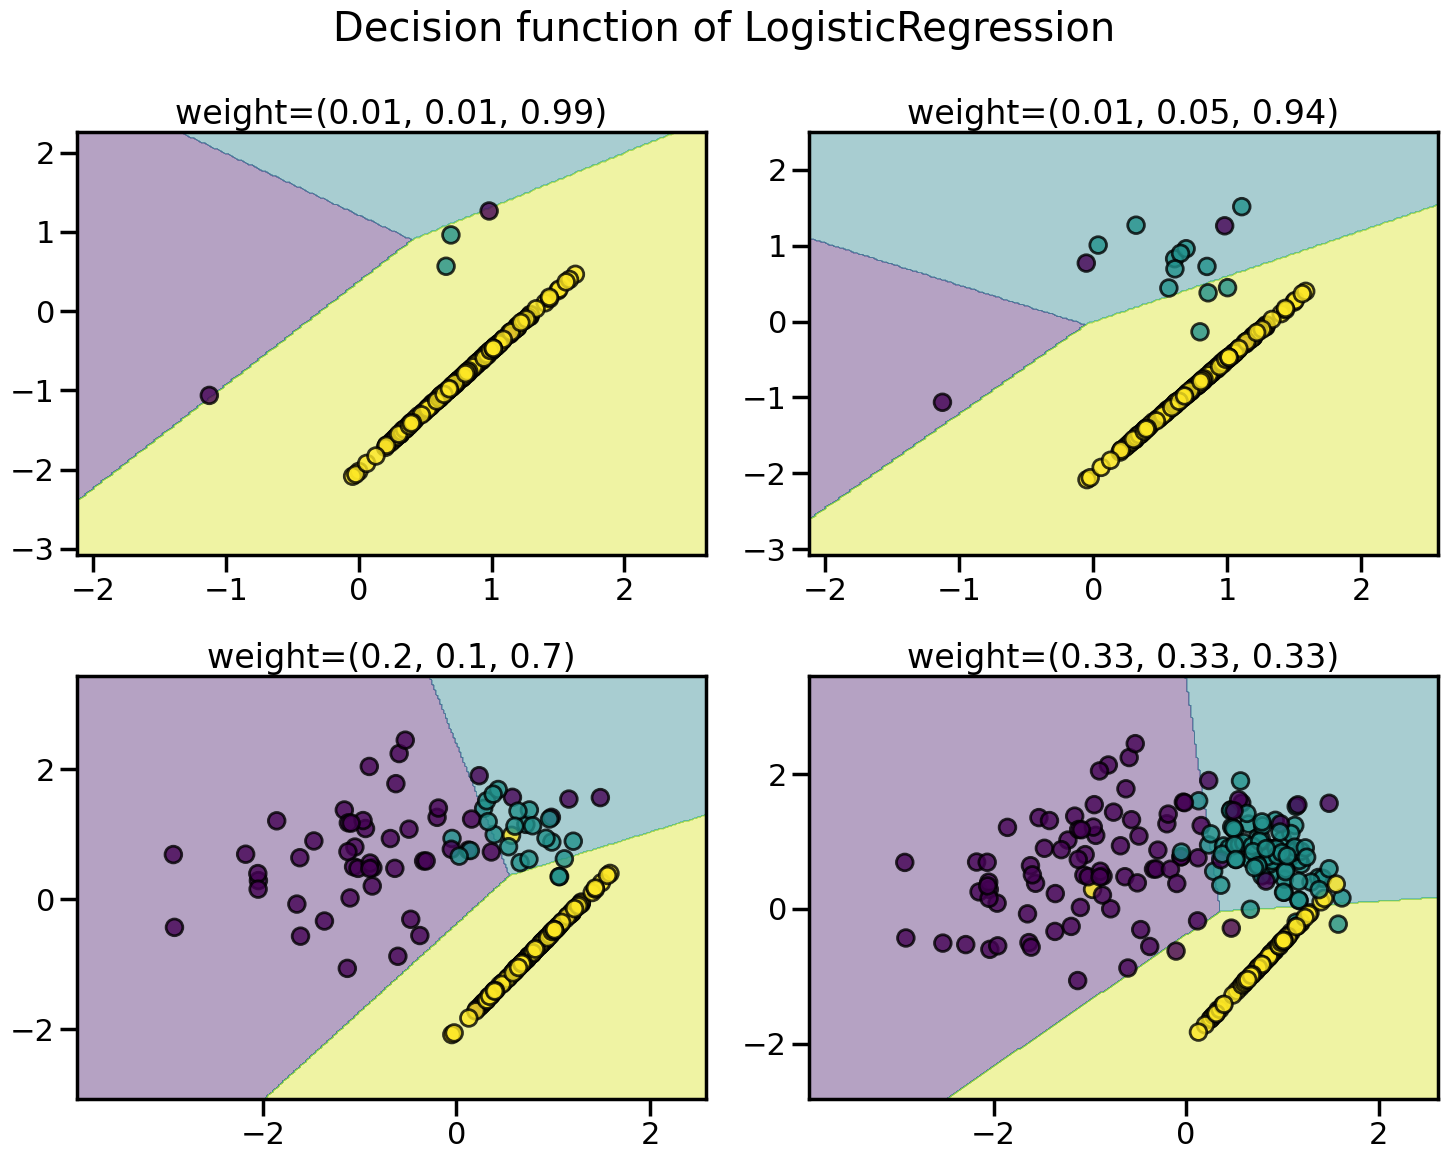

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

weights_arr = (
    (0.01, 0.01, 0.99),
    (0.01, 0.05, 0.94),
    (0.2, 0.1, 0.7),
    (0.33, 0.33, 0.33),
)
for ax, weights in zip(axs.ravel(), weights_arr):
    X, y = create_dataset(n_samples=250, weights=weights)
    clf.fit(X, y)
    plot_decision_function(X, y, clf, ax, title=f"weight={weights}")
    fig.suptitle(f"Decision function of {clf.__class__.__name__}")
fig.tight_layout()

Support Vector Machine


In [ ]:
from sklearn.svm import SVC

In [ ]:
model_linear = SVC(kernel = 'linear')

model_linear.fit(X_train, Y_train)

pred_test_linear = model_linear.predict(X_test)

np.mean(pred_test_linear==Y_test)

1.0

In [ ]:
model_poly = SVC(kernel = "poly")
model_poly.fit(X_train,Y_train)
pred_test_poly = model_poly.predict(X_test)

np.mean(pred_test_poly==Y_test) # Accuracy

0.9866666666666667

Kernel = 'rbf'( Radial Basis Function  )

In [ ]:
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(X_train,Y_train)
pred_test_rbf = model_rbf.predict(X_test)

np.mean(pred_test_rbf==Y_test) # Accuracy

1.0

In [53]:
import pickle
pickle_out = open("model_poly.pkl","wb")
pickle.dump(model_poly, pickle_out)
pickle_out.close()